# Принятие решений в бизнесе

# Описание проекта

Вместе с отделом маркетинга крупного интернет-магазина подготовлен список гипотез для увеличения выручки.\
В первой части проекта необходимо приоритизировать гипотезы, во второй - запустить A/B-тест и проанализировать результаты.

**Описание данных**

Данные для первой части

Файл ``/datasets/hypothesis.csv`` содержит следующую информацию:\
`Hypothesis` — краткое описание гипотезы;\
`Reach` — охват пользователей по 10-балльной шкале;\
``Impact`` — влияние на пользователей по 10-балльной шкале;\
``Confidence`` — уверенность в гипотезе по 10-балльной шкале;\
``Efforts`` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл ``/datasets/orders.csv`` содержит следующую информацию:\
``transactionId`` — идентификатор заказа;\
``visitorId`` — идентификатор пользователя, совершившего заказ;\
``date`` — дата, когда был совершён заказ;\
``revenue`` — выручка заказа;\
``group`` — группа A/B-теста, в которую попал заказ.

Файл ``/datasets/visitors.csv`` содержит следующую информацию:\
``date`` — дата;\
``group`` — группа A/B-теста;\
``visitors`` — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез

Загрузим необходимые библиотеки и изучим файл с исходными данными.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt


In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В нашем списке 9 гипотез с проранжированными параметрами. Определим, какую из гипотез стоит проверить первой.

### Метод ICE

Чтобы определить приоритет гипотезы данным методом, нужно перемножить коэффициенты Impact и Confidence и разделить результат на Efforts. Так и сделаем. Создадим новый столбец в дата-фрейме.

In [3]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
hypothesis.sort_values(by='ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наибольший приоритет имеет гипотеза 8 "Запустить акцию, дающую скидку на товар в день рождения", далее следуют 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".\
Наименьший приоритет у гипотез 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей", 3 "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар", 5 "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов". Проверять эти гипотезы не имеет смысла.

### Метод RICE

Приоритизируем те же гипотезы еще одним способом. Формула аналогичная, но дополнительно нужно умножить на параметр Reach (охват аудитории). Добавим в тот же дата-фрейм еще один столбец.

In [4]:
hypothesis['RICE'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
hypothesis.sort_values(by='RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Результат проверки методом RICE отличается от полученного выше. Здесь максимальный приоритет у гипотезы 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (по методу ICE она занимала третье место), т.к. это изменение затронет всех пользователей.\
На втором месте гипотеза 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". В рейтинге ICE она занимала лишь пятое место, по методу RICE ее важность более существенна, т.к. она так же затрагивает большое количество пользователей.\
Зато гипотеза 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" опустилась со второго места на третье, т.к. она охватывает гораздо меньшее количество пользователей.\
Последние 4 гипотезы так и остались последними, лишь поменяв немного порядок следования. Эти гипотезы несущественны для бизнеса и не будут проверяться.

### Вывод

Проведенный анализ гипотез показывает, что наилучшей гипотезой является гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Ее и стоит проверять в первую очередь.

## Часть 2. Анализ A/B-теста

### Предобработка данных

Изучим файлы с исходными данными.

In [5]:
orders = pd.read_csv('orders.csv')
print('orders')
display(orders.head(5))
print(orders.info())
print('\n')
print(f'Количество дубликатов в файле orders: {orders.duplicated().sum()}')
print(50*'*')
print('\n')
visitors = pd.read_csv('visitors.csv')
print('visitors')
display(visitors.head(5))
print(visitors.info())
print('\n')
print(f'Количество дубликатов в файле visitors: {visitors.duplicated().sum()}')
print(50*'*')


orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


Количество дубликатов в файле orders: 0
**************************************************


visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


Количество дубликатов в файле visitors: 0
**************************************************


Пропусков и дубликатов в данных нет. Столбцы с датой в обоих файлах имеют строковый формат. Для возможности обработки дат необходимо преобразовать формат.

In [6]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Подробнее исследуем исходные данные. Прежде всего проверим сроки проведения тестирования.

In [7]:
print(f"Начало тестирования: {orders['date'].min()}")
print(f"Конец тестирования: {orders['date'].max()}")

Начало тестирования: 2019-08-01 00:00:00
Конец тестирования: 2019-08-31 00:00:00


Итак, тестирование проводилось в течение месяца с 1 по 31 августа 2019.

Теперь рассмотрим группы теста.

In [8]:
print(orders['group'].value_counts())

B    640
A    557
Name: group, dtype: int64


В тесте принимают участие 2 группы - А и В. Количество пользователей в группе В оказалось больше, чем в группе А. Проверим, не попадают ли некоторые пользователи сразу в две группы.

In [9]:
user_dupl = orders.groupby('visitorId', as_index=False).agg({'group': 'nunique'})
user_dupl = user_dupl[user_dupl['group']==2]
user_dupl.count()

visitorId    58
group        58
dtype: int64

Нашлось 58 таких пользователей. Поскольку они попали в обе группы и видели и тот, и другой контент, то их покупки являются непоказательными, т.к. мы не можем знать, что именно повлияло на их решение о покупке. Поэтому лучшим решением будет удалить этих пользователей из анализа.

In [10]:
orders[orders['visitorId'].isin(user_dupl['visitorId'])]['transactionId'].count()

181

Всего эти пользователи имеют 181 заказ, больше, чем по одному заказу на каждого.

In [11]:
orders = orders.drop(orders[orders['visitorId'].isin(user_dupl['visitorId'])].index).reset_index(drop=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.8+ KB


Теперь у нас 1016 строк в таблице заказов.

Избавились от дублирующихся пользователей, теперь можно приступать к анализу результатов теста.

### Кумулятивная выручка по группам

Посчитаем и построим график кумулятивной выручки в каждой группе теста.

In [12]:
# создадим список уникальных пар "дата-группа"
datesGroups = orders[['date', 'group']].drop_duplicates()
# агрегируем данные:
# для каждой группы из полученного списка и всех дат, меньших или равных дате из списка, найдем количество уникальных заказов и покупателей,
# а также суммарную выручку
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# аналогично просуммируем количество пользователей
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединим таблицы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# полученную таблицу разделим на две по группе теста
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

Чтобы проконтролировать, корректно ли сформировалась итоговая таблица, проверим временной интервал.

In [13]:
print(f"Начальная дата: {cumulativeData['date'].min()}")
print(f"Конечная дата: {cumulativeData['date'].max()}")

Начальная дата: 2019-08-01 00:00:00
Конечная дата: 2019-08-31 00:00:00


Даты совпадают с периодом тестирования.

По полученным данным можем построить график.

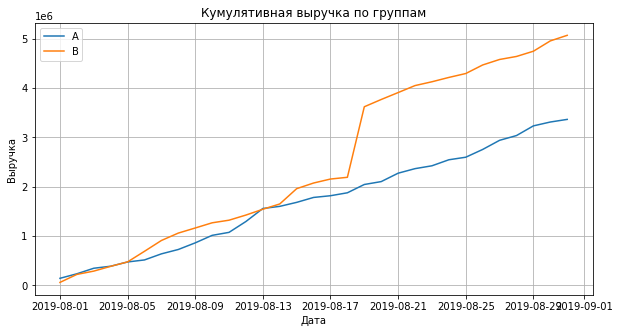

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.grid()
plt.show()

Пр графику видно, что в группе А идет равномерный рост выручки по дням. Группа В сначала имеет немного большую выручку, затем 19.08.2019 наблюдается резкий скачок, который, скорее всего обусловлен появлением аномально большого заказа либо большого количества заказов. И дальше кумулятивная выручка группы В существенно превышает выручку группы А.

### Кумулятивный средний чек по группам

Чтобы посчитать средний чек, нужно общую выручку разделить на количество заказов. Для кумулятивного среднего чека нужно взять кумулятивную выручку и кумулятивное количество заказов на каждую дату.

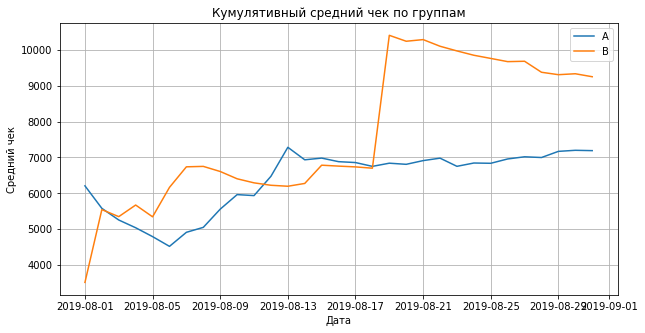

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.grid()
plt.show()

Выводы предыдущего графика подтверждаются. 19.08.2019 наблюдается резкий скачок среднего чека. В целом сложно сделать какие-либо выводы по этому графику, т.к. значения среднего чека нестабильны, группа В то лучше, то хуже группы А. При этом видно, что средний чек в группе А достаточно стабилен начиная со второй недели наблюдений. Требуется анализ выбросов.

### Относительное изменение кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека в группах. Для этого объединим данные по группам в один дата-фрейм.

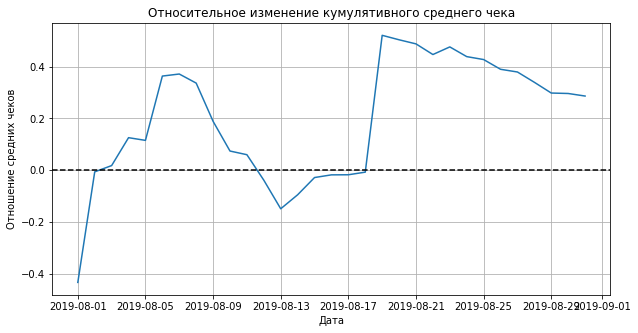

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.title('Относительное изменение кумулятивного среднего чека')
# добавим ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Отношение среднего чека в группах то больше, то меньше. Нельзя ничего сказать однозначно. Скорее всего, влияют аномально большие заказы.

### Кумулятивное среднее количество заказов по группам

Аналогичным образом построим графики кумулятивного среднего количества заказов в каждой группе теста. Для этого разделим кумулятивное количество заказов на количество посетителей по дням.

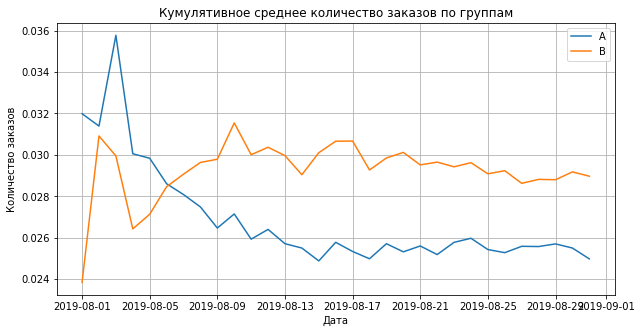

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('Кумулятивное среднее количество заказов по группам')
plt.legend()
plt.grid()
plt.show()

Среднее количество заказов примерно со второй недели наблюдений относительно стабилизировалось, в группе В среднее количество заказов стабильно больше, чем в группе А.\
Таким образом, в наблюдаемый период времени в данных группах, скорее всего, не было аномального увеличения количества заказов, а на скачки выручки повлияли только выбросы в величине среднего чека.

### Относительное изменение кумулятивного среднего количества заказов группы B к группе A

Для того, чтобы построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A, воспользуемся объединенным ранее дата-фреймом.

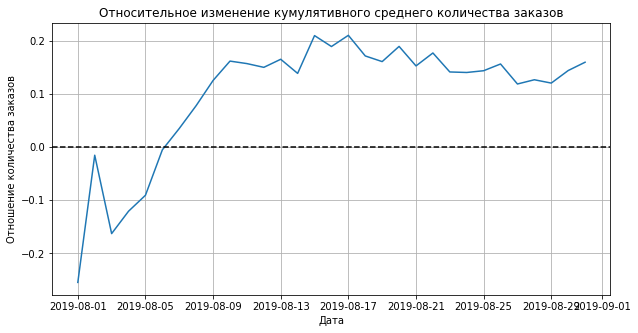

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Отношение количества заказов')
plt.title('Относительное изменение кумулятивного среднего количества заказов')
# добавим ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

График подтверждает предыдущий вывод. Со второй недели наблюдений среднее количество заказов в группе В примерно на 15-20% больше, чем в группе А. 

### Точечный график количества заказов по пользователям

Чтобы оценить количество заказов в разрезе пользователей, сгруппируем исходные данные по пользователям и найдем количество уникальных заказов для каждого.

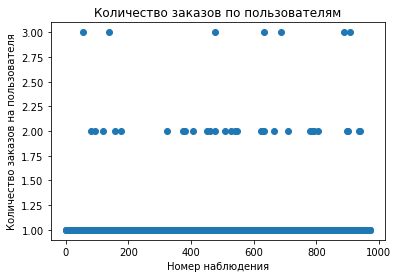

In [19]:
ordersByUsers = orders.groupby('visitorId', as_index= False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['userId', 'orders']
# построим точечный график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Номер наблюдения')
plt.ylabel('Количество заказов на пользователя')
plt.title('Количество заказов по пользователям')
plt.show()

Большинство пользователей совершили по 1 заказу, но есть и такие, у кого было 2-3 заказа.

### Перцентили количества заказов на пользователя

Чтобы понять, какие заказы считать аномальными, посчитаем 95-й и 99-й перцентили распределения.

In [20]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Таким образом, только 1% пользователей совершили 2 покупки и более. Если мы исключим их, это не повлияет на результат анализа, но очистит данные от выбросов.

### Точечный график стоимостей заказов

Аналогичным образом построим точечный график стоимостей заказов

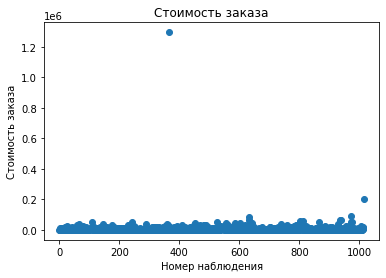

In [21]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Номер наблюдения')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказа')
plt.show()

Большинство заказов совершено на сумму до 100 000, но есть один аномально большой заказ, в 10 раз превышающий норму.

Чтобы рассмотреть основную часть заказов изменим масштаб графика.

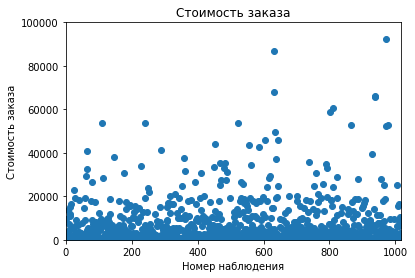

In [22]:
plt.scatter(x_values, orders['revenue'])
plt.axis([0, len(orders['revenue']), 0, 100000]) 
plt.xlabel('Номер наблюдения')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказа')
plt.show()

### Перцентили стоимости заказов

Чтобы понять, какие заказы можно исключить из анализа, посчитаем 95-й и 99-й перцентили.

In [23]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов совершены на сумму 27000 и выше и не более 1% заказов на сумму выше 54000. Таким образом, если мы ограничим выборку по уровню 30000, это поможет отфильтровать выбросы и не скажется на результате теста.

###  Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Сначала определим статистическую значимость различий между группами по исходным данным, а затем сравним результат с отфильтрованными данными.\
Сначала сравним по среднему количеству заказов.

Прежде всего подготовим данные.

In [24]:
# количество посетителей в группе А по дням 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# количество посетителей в группе А с накоплением
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# количество посетителей в группе В по дням 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
# количество посетителей в группе В с накоплением
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# заказы в группе А по дням 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# заказы в группе А с накоплением
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
# заказы в группе В по дням
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# заказы в группе В с накоплением
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
# соединим все в один общий дата-фрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


Аналогично созданному ранее дата-фрейму ordersByUsers, создадим два отдельных по группам теста.

In [25]:
# группа А
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index= False).agg({'transactionId': 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']
# группа В
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index= False).agg({'transactionId': 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

Создадим списки sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [26]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Статистическую значимость различия среднего количества заказов по результатам теста определим с помощью критерия Манна-Уитни.

Для этого сформулируем гипотезы. Нулевой гипотезой будем считать: различий в среднем количестве заказов между группами нет. Тогда альтернативная гипотеза: различия в среднем между группами есть.

Применим критерий

In [27]:
print("Значение p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

Значение p-value: 0.011


Значение p-value меньше 5%, значит, мы должны отвергнуть нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет. Проверим также относительный прирост среднего числа заказов группы B по отношению к группе А.

In [28]:
print("Прирост среднего числа заказов: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Прирост среднего числа заказов: 0.160


Прирост среднего числа заказов в группе В по сравнению с группой А составляет 16%. Неплохой результат.

Т.о. мы подтвердили сделанный ранее по графикам кумулятивного среднего количества заказов вывод о том, что количество заказов в группе В больше, чем в группе А.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Аналогичным образом определим статистическую значимость различий в среднем чеке заказа.

Сформулируем гипотезы. Нулевая: различий в среднем чеке заказа между группами нет, альтернативная: различия в среднем между группами есть.

In [29]:
print('Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Прирост среднего чека: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Значение p-value: 0.829
Прирост среднего чека: 0.287


Значение p-value существенно больше 5%, значит, мы не можем отвергнуть нулевую гипотезу об отсутствии различий в средних чеках в двух группах. При этом средний чек группы В почти на 29% превышает средний чек группы А. Здесь стоит вспомнить об аномально большом заказе, который повлиял на расчет среднего чека.

Следующим шагом рассчитаем статистическую значимость различий по отфильтрованным данным.

### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

Ограничим выборку, отфильтровав пользователей, совершивших слишком много заказов или слишком дорогие заказы. В качестве границы используем 95-й перцентиль по количеству заказов и стоимости.\
Сформируем соответствующие срезы, определим идентификаторы пользователей и объединим их в общий список аномальных пользователей.

In [30]:
usersWithManyOrders = ordersByUsers[ordersByUsers['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId']
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Подготовим выборки количества заказов по пользователям по группам теста.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders'),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders'),
    ],
    axis=0,
) 

И применим к этим выборкам статистический критерий Манна-Уитни. Гипотезы сформулированы аналогичным образом.

In [32]:
print("Значение p-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Прирост среднего числа заказов: {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Значение p-value: 0.016
Прирост среднего числа заказов: 0.174


Результат сравнения по количеству заказов для очищенных данных изменился несущественно. Оба значения чуть увеличились, но это не изменило выводов.

Таким образом тест подтвердил, что количество заказов в группе В в среднем увеличилось на 17% по сравнению с группой А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Аналогично определим статистическую значимость различий в среднем чеке заказа для отфильтрованных данных.

In [33]:

print(
    'Значение p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Прирост среднего чека: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Значение p-value: 0.727
Прирост среднего чека: -0.034


После фильтрации аномальных значений p-value незначительно уменьшился, при этом относительный прирост среднего чека в группе В уменьшился настолько, что стал отрицательным. Таким образом, средний чек в группе В уменьшился по сравнению с исходным на 3%. В целом уровень p-value показывает нам, что статистически значимого различия в размере среднего чека в двух группах нет.

## Вывод

**В первой части** данной работы была проведена приоритизация гипотез двумя методами с целью выявления наиболее перспективных гипотез, подлежащих проверке в первую очередь. Два метода дали различные результаты за счет того, что разные гипотезы охватывают разное количество пользователей. Наиболее точный результат с учетом охвата пользовательской аудитории дал метод RICE. Таким образом, для проверки была выбрана гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

**Во второй части** работы выполнен анализ результатов проведенного А/В-теста:
- исключены из анализа пользователи, попавшие сразу в две группы наблюдений,
- построены графики кумулятивных показателей (выручка, средний чек, количество заказов) по группам,
- выявлены пользователи, совершившие аномально большое количество заказов (2 заказа и более) или аномально дорогие заказы (более 30 000 руб), которые оказывают влияние на анализ результатов теста,
- рассчитана статистическая значимость различий в среднем количестве заказов и в среднем чеке между двумя группами по сырым данным и по отфильтрованным.

**В целом** по результатам проведенного анализа результатов теста можно заключить следующее:
- нет статистически значимого различия по среднему чеку между группами,
- есть статистически значимые различия по среднему количеству заказов между группами. Испытуемая группа В имеет лучшие показатели на 17%,
- график относительного различия среднего количества заказов ко второй неделе теста стабилизировался и также показывает лучшие результаты для группы В,

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В. Сегмент B лучше сегмента A по количеству заказов в среднем на 17%.